In [1]:
import matplotlib.pyplot as plt
import torchvision as tv
from torchvision import transforms, utils


import torch.nn.functional as F
import torch 
import torch.nn as nn
from torch.autograd import Variable
import torchvision.models as models
# from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader
# from PIL import Image
# import numpy as np
import torch.optim as optim
# import os
import time

import loadData

In [2]:
device = torch.device("cuda:2")

In [3]:
# 日志记录模块2
import logging
logger = logging.getLogger(__name__)
logger.setLevel(level = logging.INFO)
handler = logging.FileHandler("./10dB-HHT最后四个没加-1500epoches-0")
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

console = logging.StreamHandler()
console.setLevel(logging.INFO)

logger.addHandler(handler)
logger.addHandler(console)

In [4]:
startTime = time.time()

In [5]:
transforms = tv.transforms.Compose([
    transforms.ToTensor(),
])


numOfBatch = 9
pixel = 64
flag = 0
root = f'./{numOfBatch}/data'
batchSize = 4
train_data = loadData.MyDataset(txt=f'files_train10-舍弃最后4个.txt', transform=None)
test_data = loadData.MyDataset(txt=f'files_test10-舍弃最后4个.txt', transform=None)



train_loader = DataLoader(dataset=train_data, batch_size=batchSize, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset=test_data, batch_size=batchSize, shuffle=True, num_workers=2)


print(train_loader)
print(test_loader)

In [6]:
print(len(train_data))
print(len(test_loader))

6426
419


In [7]:
# data = iter(train_loader)

# # print(type(data))
# # print(len(data))
# data_, label = data.next()
# print(train_loader.batch_size)
# print(data_.shape)
# # print(label)
# # print(data_, label)

In [8]:
x = torch.randn(4, 1, 1200, 2).float()
conv = nn.Conv2d(in_channels = 1, out_channels = 128, kernel_size = (10, 1))
x = conv(x)
x.shape
conv2 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (3, 2))
x = conv2(x)
x.shape

torch.Size([4, 256, 1189, 1])

In [9]:
# 256*1189

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = (1, 10))
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = (2, 3))
        
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)
        
        self.fc1 = nn.Linear(20304, 1024)
        self.fc2 = nn.Linear(1024, 500)
        self.fc3 = nn.Linear(500, 54)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 1)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 1)
    
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [11]:
# TensorBoard
# from tensorboardX import SummaryWriter
# net = Net()
# # writer = SummaryWriter('writer928') #建立一个保存数据用的东西
# dummy_input = torch.rand(2,160,400)  # 假设输入20张1*28*28的图片
# with SummaryWriter(comment='Net1') as w:
#     w.add_graph(net, (dummy_input,))

In [12]:
net = Net()

net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=net.parameters(), lr=0.0001, momentum=0.9)

epochs = 1500
average_loss_series = []

In [13]:
for a, b in enumerate(train_loader):
    inputs, labels = b
    print(inputs.shape)
    break

torch.Size([4, 1, 2, 1280])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
[1, 1000] loss: 3.988890793085098
设备号为: tensor([48, 18, 49, 21], device='cuda:2')，预测的设备号为:tensor([21, 50, 51, 26], device='cuda:2')
[1, 1000] acc: 0.020500000566244125
[2, 1000] loss: 3.9866481103897096
设备号为: tensor([47, 50, 40, 36], device='cuda:2')，预测的设备号为:tensor([47, 21, 35, 28], device='cuda:2')
[2, 1000] acc: 0.01925000175833702
[3, 1000] loss: 3.981469290971756
设备号为: tensor([21, 41,  2,  9], device='cuda:2')，预测的设备号为:tensor([51, 34, 51, 51], device='cuda:2')
[3, 1000] acc: 0.029000001028180122
[4, 1000] loss: 3.9712488877773287
设备号为: tensor([ 3,  9, 31, 16], device='cuda:2')，预测的设备号为:tensor([51,  3, 20, 37], device='cuda:2')
[4, 1000] acc: 0.03400000184774399
[5, 1000] loss: 3.942637351512909
设备号为: tensor([ 1, 12, 42, 35], de

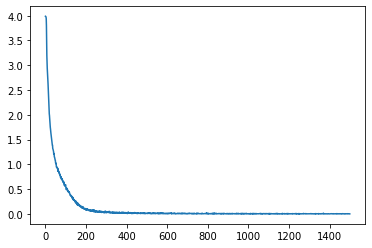

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
设备号为: tensor([ 8, 15, 41,  8], device='cuda:2')，模型训练后得到的设备号为:tensor([ 8, 44, 16,  8], device='cuda:2')
目前一共测试了4组，预测成功的一共有2组
设备号为: tensor([26, 42, 11, 39], device='cuda:2')，模型训练后得到的设备号为:tensor([26, 40, 11, 39], device='cuda:2')
目前一共测试了8组，预测成功的一共有5组
设备号为: tensor([11, 27, 49, 36], device='cuda:2')，模型训练后得到的设备号为:tensor([11, 39, 50, 36], device='cuda:2')
目前一共测试了12组，预测成功的一共有7组
设备号为: tensor([33, 28, 31, 17], device='cuda:2')，模型训练后得到的设备号为:tensor([33, 28, 17, 17], device='cuda:2')
目前一共测试了16组，预测成功的一共有10组
设备号为: tensor([ 7, 51, 34, 35], device='cuda:2')，模型训练后得到的设备号为:tensor([ 7, 40, 34, 35], device='cuda:2')
目前一共测试了20组，预测成功的一共有13组
设备号为: tensor([39,  9, 46,  5], device='cuda:2')，模型训练后得到的设备号为:tensor([11,  9, 46,  5], device='cuda:2')
目前一共测试了24组，

In [14]:
%matplotlib inline


if __name__ == '__main__':
    for epoch in range(epochs):
        running_loss = 0.0
        running_acc = 0.0

        for i, data in enumerate(train_loader):
#             print("i:", i )
#             print("data: ", data[0])
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

#             inputs = inputs.permute(0, 2, 1)
            
            inputs = torch.tensor(inputs, dtype=torch.float32, device = device)

            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, dim=1)
            total = labels.size(0)
#             print('原来的值:{0}, 预测的值:{1}'.format(labels, predicted))
            running_correct = (predicted == labels).sum()
            running_acc += running_correct
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()

            # 每loopNum个batch打印一次训练状态
            loopNum = 1000
            if i % loopNum == loopNum - 1:
                average_loss = running_loss / loopNum
                logger.info('[{0}, {1}] loss: {2}'.format(epoch + 1, i + 1, average_loss))
                logger.info('设备号为: {0}，预测的设备号为:{1}'.format(labels, predicted))
#                 logger.info(torch.cuda.current_device ())
                running_acc = running_acc.float()
                average_acc = running_acc / loopNum / total
                
                logger.info('[{0}, {1}] acc: {2}'.format(epoch + 1, i + 1, average_acc))
                average_loss_series.append(average_loss)
                running_loss = 0.0
                running_acc = 0.0

    x = range(0, len(average_loss_series))
    plt.figure()
    plt.plot(x, average_loss_series)
#     plt.savefig("Loss.png")
    plt.savefig("Loss.png", bbox_inches="tight")
    plt.show()
    

    # %%
    # 在测试集上测试
    realLabel = []
    predictedLabel = []

    def correct_rate(net, testloader):
        correct = 0.0
        total = 0.0
        count = 0
        correctpredict = 0

        for data in testloader:
            images, labels = data
            images, labels = images.to(device),labels.to(device)
            realLabel.append([int(label) for label in labels])
    
            tests = torch.tensor(images, dtype=torch.float32,device=device)
            outputs = net(tests)

            _, predicted = torch.max(outputs.data, dim=1)
            logger.info('设备号为: {0}，模型训练后得到的设备号为:{1}'.format(labels, predicted))
#             deviceNumber = torch.cuda.current_device ()
#             logger.info(deviceNumber)
            
            labelsn = labels.cpu().numpy()
            pn = predicted.cpu().numpy()
            count += len(labelsn)
            
            for i in range(len(labelsn)):
                if labelsn[i] == pn[i]:
                    correctpredict += 1
                
            
            logger.info('目前一共测试了{0}组，预测成功的一共有{1}组'.format(count, correctpredict))
            predictedLabel.append([int(label) for label in predicted])
            
            total += labels.size(0)
            correct += (predicted == labels).sum()

            
        logger.info("total的值为：{total}")
#         return 100 * correct  # / total
        return 100 * correct/ total 


    correct = correct_rate(net, test_loader)
    logger.info(f'{len(test_loader) * 3}张测试集中准确率为： {correct}%')

    # %%
    import itertools
    from sklearn.metrics import confusion_matrix

    realLabel = list(itertools.chain.from_iterable(realLabel))
    predictedLabel = list(itertools.chain.from_iterable(predictedLabel))

    cm = confusion_matrix(realLabel, predictedLabel)
    logger.info(cm)

#     logger.info('the running time is:{1}'.format(time.time() - startTime))
    torch.save(net.state_dict(), f'./model_10dB_最后4个没加_0.pkl')
    

In [15]:
torch.cuda.current_device ()

0

In [16]:
aa = iter(train_loader)
a, b = aa.next()
print(a[0].shape)
print(a)

torch.Size([1, 2, 1280])
tensor([[[[ 0.0764,  0.5942,  0.7374,  ...,  0.1112, -0.4033, -0.4831],
          [-1.1899, -1.3986, -0.8070,  ..., -1.2272, -1.1088, -1.0598]]],


        [[[ 0.1487,  0.0312,  0.8155,  ...,  0.1659, -0.2684, -0.3538],
          [-1.0150, -1.1150, -1.1933,  ..., -0.1415, -0.6916, -0.5935]]],


        [[[ 0.4319,  0.8119,  1.2780,  ...,  0.4447,  0.3471, -0.2091],
          [-1.2557, -1.2495, -1.2814,  ..., -0.8475, -0.8233, -0.7472]]],


        [[[ 0.1980,  0.0663,  0.5115,  ...,  0.6133,  0.6756,  0.0450],
          [-1.1964, -1.0797, -0.7153,  ..., -0.5603, -0.8270, -0.8443]]]],
       dtype=torch.float64)


In [17]:
input = torch.randn(20, 16, 50, 100)
input.shape

torch.Size([20, 16, 50, 100])

In [18]:
m2=nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2))
inpu1=Variable(torch.randn(20,16,50,100))
print(inpu1.shape)
output=m2(inpu1)
print(output.shape)

torch.Size([20, 16, 50, 100])
torch.Size([20, 33, 28, 100])


In [19]:
total

2

In [20]:
torch.cuda.current_device () 

0

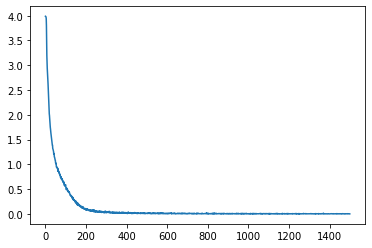

In [21]:
x = range(0, len(average_loss_series))
plt.figure()
plt.plot(x, average_loss_series)
plt.savefig("Loss1.png", bbox_inches="tight")
plt.show()